In [67]:
import pandas as pd

In [68]:
df = pd.read_excel("D:\\DDAA\\Sprint10\\metriques_martstips.xlsx")
df.head()

,Video Links,Views,Likes,Comments,Shares,Saves,Hashtags,Publication Date,Audio Label
0,https://www.tiktok.com/@martstips/video/690137...,10400.0,527,2,13,19,"#firsttiktok, #xmasdeco, #xmastree, #xmastime,...",2020-12-01,Tactical Christmas - Chivi 😘
1,https://www.tiktok.com/@martstips/video/690172...,13800.0,748,4,48,50,"#covid19, #mask, #mascarilla, #portamascarilla...",2020-12-02,sonido original - Marts Tips
2,https://www.tiktok.com/@martstips/video/690209...,23400.0,1015,7,11,36,"#tip, #home, #armario, #organización, #organiz...",2020-12-03,som original - L I S A 💋
3,https://www.tiktok.com/@martstips/video/690286...,25200.0,1119,2,22,89,"#especias, #especiero, #spices, #beforeandafte...",2020-12-05,som original - Carol Lomeli
4,https://www.tiktok.com/@martstips/video/690327...,10400.0,293,4,1,4,"#xmas, #xmasfyp, #xmastree, #xmastime, #xmas20...",2020-12-06,All I Want for Christmas Is You - Mariah Carey


In [69]:
df.shape[0]

657

In [70]:
def clean_hashtag_list(x):
    if isinstance(x, list):
        # Already a list of hashtags
        return [tag.strip().lower().replace('#', '') for tag in x if isinstance(tag, str) and tag.strip()]
    elif isinstance(x, str):
        # String of comma-separated hashtags
        return [tag.strip().lower().replace('#', '') for tag in x.split(',') if tag.strip()]
    else:
        # Anything else (e.g. NaN)
        return []

df['Hashtags'] = df['Hashtags'].apply(clean_hashtag_list)


In [71]:
# Count hashtag occurrences
hashtag_occurrences = {}
for tags in df['Hashtags']:
    for tag in tags:
        hashtag_occurrences[tag] = hashtag_occurrences.get(tag, 0) + 1

# Sort hashtags
hashtags_sorted = dict(sorted(hashtag_occurrences.items(), key=lambda item: item[1], reverse=True))
for tag, count in list(hashtags_sorted.items()):
    print(f"{tag}: {count}")

len(hashtags_sorted)

trucosytips: 287
tips: 171
aprendecontiktok: 133
calendariodeadviento: 124
xmas: 118
navidad: 114
lifehacks: 81
amazonfinds: 81
escaperoom: 75
lifehack: 66
tipshogar: 64
gifted: 62
vlogmas: 50
adventcalendar: 49
orden: 39
tipsorden: 29
skincare: 26
exit: 26
tip: 25
tipsdelimpieza: 25
tipsdemoda: 23
exitthegameadventcalendar: 23
sephora: 23
parati: 21
cleantok: 21
fyp: 20
tipsdeviaje: 20
tipscocina: 19
amazon: 18
navidansia: 18
hairtok: 18
tutorial: 17
beautytips: 16
halloween: 15
organizacion: 13
ikea: 13
asmr: 13
peinadosfaciles: 13
maquillaje: 12
planes: 11
verano: 11
summertips: 11
tutorialpeinado: 11
productosamazon: 11
temu: 11
temufinds: 11
temuespaña: 11
unboxing: 10
velas: 10
tipsdebelleza: 10
humor: 10
temuspain: 10
temues: 10
makeup: 9
doblarropa: 9
shoptemu: 9
regalos: 8
geocaching: 8
booktok: 8
deco: 8
trucos: 7
libros: 7
diy: 7
tipsorganizacion: 7
nespresso: 7
quepuedohacer: 7
tipsdecocina: 7
tipsverano: 7
summer: 7
miincosmetics: 7
ruidovisual: 7
trend: 7
martstips: 6
fas

1024

In [72]:
manual_exclude = {'trucosytips', 'tips'}  # També podríem treure  'aprendecontiktok','fyp','parati'
df['FilteredHashtags'] = df['Hashtags'].apply(lambda tags: [t for t in tags if t not in manual_exclude])

Ara fem un embedding utilitzant Hugging Face

In [73]:
from sentence_transformers import SentenceTransformer

# Get all unique hashtags
all_hashtags = set(tag for tags in df['FilteredHashtags'] for tag in tags)
hashtag_list = list(all_hashtags)

# Load Hugging Face model
model = SentenceTransformer('all-MiniLM-L6-v2')
hashtag_embeddings = model.encode(hashtag_list, show_progress_bar=True)


Batches: 100%|██████████| 32/32 [00:02<00:00, 12.96it/s]


Clustering amb kmeans

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = range(2, 21)  # Try clusters from 2 to 20
silhouette_scores = []

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(hashtag_embeddings)
    score = silhouette_score(hashtag_embeddings, cluster_labels)
    silhouette_scores.append(score)
    print(f"n_clusters = {n} → silhouette score = {score:.4f}")

n_clusters = 2 → silhouette score = 0.0364
n_clusters = 3 → silhouette score = 0.0348
n_clusters = 4 → silhouette score = 0.0236
n_clusters = 5 → silhouette score = 0.0314
n_clusters = 6 → silhouette score = 0.0313
n_clusters = 7 → silhouette score = 0.0354
n_clusters = 8 → silhouette score = 0.0380
n_clusters = 9 → silhouette score = 0.0375
n_clusters = 10 → silhouette score = 0.0361
n_clusters = 11 → silhouette score = 0.0381
n_clusters = 12 → silhouette score = 0.0353
n_clusters = 13 → silhouette score = 0.0359
n_clusters = 14 → silhouette score = 0.0367
n_clusters = 15 → silhouette score = 0.0366
n_clusters = 16 → silhouette score = 0.0382
n_clusters = 17 → silhouette score = 0.0391
n_clusters = 18 → silhouette score = 0.0389
n_clusters = 19 → silhouette score = 0.0407
n_clusters = 20 → silhouette score = 0.0422


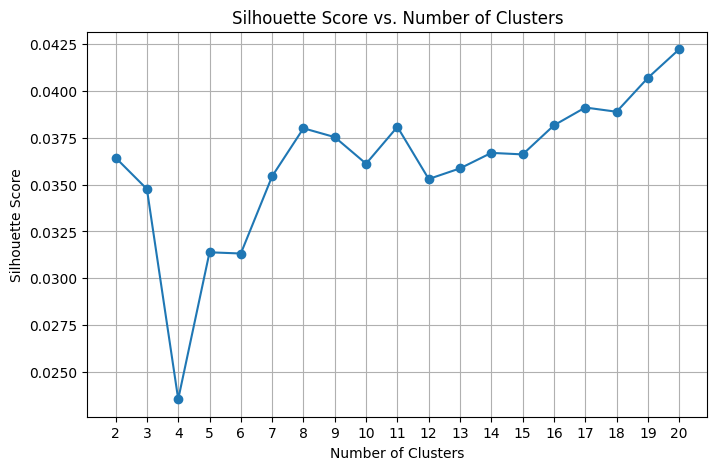

In [75]:
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(range_n_clusters)
plt.show()

Choosing the best number of clusters

In [76]:
best_n = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

# Final KMeans model
final_kmeans = KMeans(n_clusters=best_n, random_state=42)
hashtag_labels = final_kmeans.fit_predict(hashtag_embeddings)
hashtag_cluster_map = dict(zip(hashtag_list, hashtag_labels))

In [77]:
from collections import defaultdict

# Group hashtags by cluster ID
clusters = defaultdict(list)
for hashtag, label in zip(hashtag_list, hashtag_labels):
    clusters[label].append(hashtag)

for cluster_id, tags in clusters.items():
    print(f"\n🔹 Cluster {cluster_id} ({len(tags)} hashtags):")
    print(", ".join(sorted(tags)))


🔹 Cluster 11 (86 hashtags):
asmrcomida, barranquismo, bisuteria, botasvaqueras, cajasmultiusos, cajones, camisablanca, casaabandonada, casatarradellas, caudalie, cepillodedientes, cerradura, cerveza, cestadesorden, cesto, comoahorrar, comocrearona, comoda, comoencasa, cortartomate, cosasquepasan, cuelloalto, cuentastiktok, cuidate, cursodedoblaje, guashafacial, guashamassage, guashatutorial, guatchicas, hacermaleta, juego, juegodeamigas, juegodemesa, juegos, juegosdemesa, juegosencasa, lactancia, lacuponera, limpiarjoyas, limpiarjuntas, limpiarzapatillas, llaveroantivioladores, lorealparisespaña, manicura, manicuracasera, manicurafrancesa, manicuranavidad, maquinadecafe, mascarillaspersonalizadas, mercadillo, mercadona, misemanamassanta, moroccanoil, navidad, navidansa, nochedechicas, novedadeszara, nuevasuñas, nuevojuego, olimpiadasdenavidad, ordenencasa, piedrablanca, plantarencasa, portamascarillas, primavera, rutinacoreana, sabado, sabadodechicas, sabiasque, sangrefalsa, santestev

Show Top-N Most Frequent Hashtags per Cluster 

In [78]:
# Example: assuming you already have this dictionary from earlier
hashtag_freqs = df['FilteredHashtags'].explode().value_counts().to_dict()

# Print top 5 most common hashtags in each cluster
for cluster_id, tags in clusters.items():
    sorted_tags = sorted(tags, key=lambda x: hashtag_freqs.get(x, 0), reverse=True)
    print(f"\n🔹 Cluster {cluster_id} (top hashtags):")
    print(", ".join(sorted_tags[:5]))



🔹 Cluster 11 (top hashtags):
navidad, temuespaña, shoptemu, vestidos, santjordi

🔹 Cluster 3 (top hashtags):
maquillaje, doblarropa, maletaprimark, maletademano, mochiladeviaje

🔹 Cluster 2 (top hashtags):
tipshogar, tipsorden, tip, tipsdelimpieza, tipsdemoda

🔹 Cluster 5 (top hashtags):
dia4, dia20, dia6, dia7, dia19

🔹 Cluster 16 (top hashtags):
organizacion, tutorialpeinado, quepuedohacer, favoritosdelmes, decoracion

🔹 Cluster 17 (top hashtags):
humor, unboxing, summer, trend, diy

🔹 Cluster 8 (top hashtags):
orden, ordenatuhogar, sanvalentin, limpieza, philipshogar

🔹 Cluster 10 (top hashtags):
parati, verano, velas, deco, maleta

🔹 Cluster 9 (top hashtags):
productosamazon, libros, productostop, invitadaboda, doblartoallas

🔹 Cluster 1 (top hashtags):
peinadosfaciles, miincosmetics, peinadosfacilesyrapidos, recogidosfaciles, 3inaspain

🔹 Cluster 6 (top hashtags):
nespresso, martstips, ikeahack, publi, cafe

🔹 Cluster 13 (top hashtags):
aprendecontiktok, calendariodeadviento, xma

Add cluster info to posts. This will give each post a list of hashtag clusters it belongs to.

In [79]:
# # Add hashtag cluster labels to each post
# def get_post_clusters(tags):
#     return list({hashtag_cluster_map.get(tag, -1) for tag in tags})  # -1 for unmatched

# df['HashtagClusters'] = df['FilteredHashtags'].apply(get_post_clusters)

Assign Dominant Cluster Per Post. We assign one cluster per post, based on the most common hashtag cluster:

In [80]:
# from collections import Counter

# def most_common_cluster(clusters):
#     filtered = [c for c in clusters if c != -1]
#     if not filtered:
#         return -1
#     return Counter(filtered).most_common(1)[0][0]

# df['MainCluster'] = df['HashtagClusters'].apply(most_common_cluster)


In [81]:
df.head()

,Video Links,Views,Likes,Comments,Shares,Saves,Hashtags,Publication Date,Audio Label,FilteredHashtags
0,https://www.tiktok.com/@martstips/video/690137...,10400.0,527,2,13,19,"[firsttiktok, xmasdeco, xmastree, xmastime, xm...",2020-12-01,Tactical Christmas - Chivi 😘,"[firsttiktok, xmasdeco, xmastree, xmastime, xm..."
1,https://www.tiktok.com/@martstips/video/690172...,13800.0,748,4,48,50,"[covid19, mask, mascarilla, portamascarillas, ...",2020-12-02,sonido original - Marts Tips,"[covid19, mask, mascarilla, portamascarillas, ..."
2,https://www.tiktok.com/@martstips/video/690209...,23400.0,1015,7,11,36,"[tip, home, armario, organización, organize, c...",2020-12-03,som original - L I S A 💋,"[tip, home, armario, organización, organize, c..."
3,https://www.tiktok.com/@martstips/video/690286...,25200.0,1119,2,22,89,"[especias, especiero, spices, beforeandafter, ...",2020-12-05,som original - Carol Lomeli,"[especias, especiero, spices, beforeandafter, ..."
4,https://www.tiktok.com/@martstips/video/690327...,10400.0,293,4,1,4,"[xmas, xmasfyp, xmastree, xmastime, xmas2020, ...",2020-12-06,All I Want for Christmas Is You - Mariah Carey,"[xmas, xmasfyp, xmastree, xmastime, xmas2020, ..."


Definim les categories i subcategories manualment

In [82]:
# Define your mapping (lowercase, no '#')
category_map = {
    'Festivitats': {
        'Calendari Advent': ['calendariodeadviento'],
        'Nadal':['xmas','navidansia','navidad'],
        'Halloween': ['halloween', 'halloweentips','tipshalloween']
    },    
    'Llar': {
        'Cuina': ['tipscocina','tipsdecocina','especiero','cooking','batidos','trucoscocina','airfryer','beeswax'],
        'Neteja': ['tipslimpieza','tipsdelimpieza','cleantok','limpieza','wc','limpiarjoyas','esterilizador'],
        'Ordre i Decoració': ['tipsorden', 'orden', 'organización','organizacion','tipsorganizacion','cajones','perchas','foldingclothes','decor','joyero','deco','decotips','tipshogar','cambiodearmario'],
        'Trucs pel dia a dia':['rosa','lifehack','lifehacks','quicktip','coche','aprendecontiktok']
    },
    'Cura personal': {
        'Cabell': ['tutorialpeinado','scrunchies','tipsdepelo','hairtok'],
        'Maquillatge': ['beautytips', 'skincare','makeup','maquillaje','tipsmaquillaje','tipsdebelleza','makeuptips','eyelinertutorial'],
        'Manicura': ['tipsmanicura','manicura','uñas'],
        'Moda': ['fashiontips', 'tipsdemoda','tipsmoda', 'haul', 'vestidos','vestidoinvitada','summerclothes','tryonhaul','zara'],
        'Altres': ['relax','massage','guasha','selfcare']
    },
    'Oci i Cultura': {
        'Viatges': ['tipsdeviaje','traveltips','summertips','vacaciones','holidays','mochiladeviaje','maleta'],
        'Plans': ['planes','fridaynight','saturdaymood','sundaymood','plandeviernes','barranquismo','marcanthony','coldplay','dinnershow'],
        'Llibres': ['booktok','libros'],
        'Sèries i Pelis':['netflix','programastv','concursos','cine'],
        'DIY': ['velas','vela','candle','candles','diy','velasdecolores'],
        'Geocaching': ['geocaching'],
        'Jocs':['juegos','juegosdemesa','juegodemesa','puzzle'],
        'Regals':['regalosoriginales','regalos','ideasregalo','giftwrapping','envolver','envolverregalos','retosincelo']
    },
    'Gadgets': {
        'Temu': ['temu','temues','temuspain'],
        'Amazon':['amazon','amazonfinds','amazonprimedays'],
        'Altres': ['gadgets','tipsiphone','accesoriosmovil','llaverosdefensapersonal','llaveroantivioladores','tipsseguridad']
    }   
}

# Function to assign category and subcategory
def assign_category(hashtags):
    hashtags = set(hashtags)  # set for faster lookup
    for category, subcats in category_map.items():
        for subcat, tag_list in subcats.items():
            if any(tag in hashtags for tag in tag_list):
                return pd.Series([category, subcat])
    return pd.Series(['Altres', 'Altres'])

# Apply to DataFrame
df[['Category', 'Subcategory']] = df['Hashtags'].apply(assign_category)

# Count unassigned posts
# unassigned_count = df['Category'].isna().sum()
# total_posts = len(df)
# print(f"{unassigned_count} posts were left without a category ({unassigned_count * 100 / total_posts:.2f}%).")


Mirem quants ens han quedat a la categoria 'Altres'

In [83]:
# pd.set_option('display.max_rows', 800)
df[df['Category'] == 'Altres'].shape[0]

47

Procedim a afegir una columna que ens indiqui si el vídeo és publicitat o no

In [84]:
hashtags_publicitat = [
    'gifted','publi', 'colab', 'publicidad', 'unboxing', 'calendariodeadviento'
    'casatarradellas', 'barefoot','viledaturbo','normal','nespresso'
    'limpiazapatillasphilips', 'caramelpopcorn', 'emma', 'tatay',
    'amazon','amazonfinds','amazon','amazonprime', 'primeday', 'amazonprimeday', 
    'temuhaul', 'temu', 'temues'
]

urls_publicitat = [
    'https://www.tiktok.com/@martstips/video/7464646872641146134',
    'https://www.tiktok.com/@martstips/video/7410837044403981600',
    'https://www.tiktok.com/@martstips/video/7321762222043139360',
    'https://www.tiktok.com/@martstips/video/7049068678276484358',
    'https://www.tiktok.com/@martstips/video/6974479375785790726',
    'https://www.tiktok.com/@martstips/video/6952586859880926470',
    'https://www.tiktok.com/@martstips/video/6938484342528216325',
    'https://www.tiktok.com/@martstips/video/6938115945412021510'

]

df['Publicitat'] = df.apply(
    lambda row: 1 if (
        any(tag in hashtags_publicitat for tag in row['Hashtags']) or
        row['Video Links'] in urls_publicitat
    ) else 0,
    axis=1
)

In [86]:
archivo_salida = 'D:\\DDAA\\Sprint10\\metriques_martstips_categories.xlsx'
df.to_excel(archivo_salida, index=False)

Fem un wordcloud dels haghtags (això va a la intro, o sigui que encara no eliminem els hashtags súper generals que hem eliminat per fer el clustering)

In [ ]:
# Explode the list of hashtags into rows
hashtag_series = df['Hashtags'].explode()

# Count frequency of each hashtag
hashtag_freq = hashtag_series.value_counts().reset_index()
hashtag_freq.columns = ['Hashtag', 'Frequency']

# Optional: sort by frequency
hashtag_freq = hashtag_freq.sort_values(by='Frequency', ascending=False)

# Preview
print(hashtag_freq.head())

hashtag_freq.to_csv('hashtag_wordcloud.csv', index=False)

                Hashtag  Frequency
0           trucosytips        287
1                  tips        171
2      aprendecontiktok        133
3  calendariodeadviento        124
4                  xmas        118
